In [2]:
# coding: utf-8
# @Author: boyac
# @Date:   2018-06-09 20:00:27
# @Last Modified by:   boyac
# @Last Modified time: 2018-06-12 13:15:53


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Feeding
maindf = pd.read_csv("NEISS2014.csv")
bodydf = pd.read_csv("BodyParts.csv")
diagdf = pd.read_csv("DiagnosisCodes.csv")
dispdf = pd.read_csv("Disposition.csv")

In [3]:
# Question 1
"""
1_1. What are the top three body parts most frequently represented in this dataset?
1_2. What are the top three body parts that are least frequently represented?

Answer:
1_1. Head, Face, Finger
1_2. 25-50% of body, Pubic region, Internal
"""

# Join BodyParts data to our main data
tbl01 = pd.merge(maindf, bodydf, how="left", left_on="body_part", right_on="Code")

# Data clean and drop unwanted records
tbl01 = tbl01[(tbl01["BodyPart"]!="Not Recorded")]
tbl01 = tbl01.groupby("BodyPart")["BodyPart"].agg(["count"])
top3 = tbl01.sort_values(["count"], ascending=False).head(3)
bottom3 = tbl01.sort_values(["count"], ascending=False).tail(3)

top3, bottom3

(          count
 BodyPart       
 Head       9891
 Face       5786
 Finger     5783,                 count
 BodyPart             
 Internal          549
 Pubic region      286
 25-50% of body      4)

In [4]:
# Question 2
"""
2_1. How many injuries in this dataset involve a skateboard?
2_2. Of those injuries, what percentage were male and what percentage were female?
2_3. What was the average age of someone injured in an incident involving a skateboard?

Answer:
2_1. 495 of injuries involve a skateboard.
2_2. 82.02% of those injuries were male.
2_3. 17.98% of those injuries were female.
2_4. 17.89 was the average age of someone injured in an incident involving a skateboard
"""

# Code: 1333 = skateboard
skateboard = 1333

# Union data involve a skateboard
tbl02 = maindf[(maindf["prod1"] == skateboard)|(maindf["prod2"] == skateboard)]

# Number of male and female of those injuries
tbl02_m = tbl02["sex"] == "Male"
tbl02_f = tbl02["sex"] == "Female"
tbl02_m = tbl02[tbl02_m]
tbl02_f = tbl02[tbl02_f]

# Percentage of male and female of those injuries
m1333 = round(len(tbl02_m))/len(tbl02)
f1333 = round(len(tbl02_f))/len(tbl02)

print "{} of injuries involve a skateboard.".format(len(tbl02))
print "{0:.2f}% of those injuries were male.".format(m1333)
print "{0:.2f}% of those injuries were female.".format(f1333)
print "{0:.2f} was the average age of someone injured in an incident involving a skateboard.".format(tbl02["age"].mean())

495 of injuries involve a skateboard.
0.82% of those injuries were male.
0.18% of those injuries were female.
17.89 was the average age of someone injured in an incident involving a skateboard.


In [34]:
# Question 3
"""
3_1. What diagnosis had the highest hospitalization rate? 
3_2. What diagnosis most often concluded with the individual leaving without being seen?
3_3. Briefly discuss your findings and any caveats you'd mention when discussing this data.

Answer:
3_1. Fracture
3_2. Laceration
3_3. The age of people who are hospitalized on average is twice higher than those who are leaving without being seen
"""

# Join Diagnosis data to our main data
tbl03 = pd.merge(maindf, diagdf, how="left", left_on="diag", right_on="Code")

# Code: 4 = hospitalization
# Filter data with disposition = 4 for hispitalization and count its frequencies
tbl04 = tbl03[(tbl03["disposition"] == 4)]
tbl04= tbl04.groupby("Diagnosis")["Diagnosis"].agg(["count"])
topdiag04 = tbl04.sort_values(["count"], ascending=False).head(3)
topdiag04

# Code:6 = left without being seen
# Filter data with disposition = 6 for left without being seen and count its frequencies
tbl06 = tbl03[(tbl03["disposition"]==6)]
tbl06= tbl06.groupby("Diagnosis")["Diagnosis"].agg(["count"])
topdiag06 = tbl06.sort_values(["count"], ascending=False).head(3)
topdiag06

# Transform age code into actual age, age < 2 year-old = 1
tbl03.loc[tbl03["age"] == 0, "age_group"] = 1
tbl03.loc[tbl03["age"] >= 200, "age_group"] = 1
tbl03.loc[tbl03["age"] < 200, "age_group"] = tbl03["age"]

# Average age of disposition ==4, hospitalization
agediag04 = tbl03[(tbl03.disposition == 4)]["age_group"].mean()

# Average age of disposition ==6, left without being seen
agediag06 = tbl03[(tbl03.disposition == 6)]["age_group"].mean()

print "Average age of disposition == 4: {}".format(agediag04)
print "Average age of disposition == 6: {}".format(agediag06)
print "Average age of hospitalization vs left withought being seen {0} vs. {1}".format(agediag04, agediag06)

Average age of disposition == 4: 57.2452877607
Average age of disposition == 6: 28.1098546042
Average age of hospitalization vs left withought being seen 57.2452877607 vs. 28.1098546042


In [35]:
# Question 4
"""
4_1. Visualize any existing relationship between age and reported injuries

Answer:
# Plot of Diagnosis count and laceration is the most freqent diagnosis
# Count of age categories and found most patients were in Adults categories
# Distribution of age categories among respective dianosis and found internal organ injury were rather equally distributed
"""

# Extract age and reported injuries from tbl03
tbl07 = tbl03[["age","Diagnosis"]]

# Creating a new age group, if coded as 0 = age 1, coded >= 200 age 1, others remains the same
tbl07.loc[tbl07["age"] == 0, "age_group"] = 1
tbl07.loc[tbl07["age"] >= 200, "age_group"] = 1
tbl07.loc[tbl07["age"] < 200, "age_group"] = tbl07["age"]

tbl07

,age,Diagnosis,age_group
0,21,Internal organ injury,21.0
1,62,Fracture,62.0
2,21,Fracture,21.0
3,30,Strain or Sprain,30.0
4,16,Fracture,16.0
5,22,Strain or Sprain,22.0
6,92,Avulsion,92.0
7,89,Fracture,89.0
8,75,Laceration,75.0
9,68,Strain or Sprain,68.0


In [36]:
# Insert a new column (categories) to classify age groups
ranges = [0,2,12,18,65,150]
age_groups = ["Infant", "Children", "Adolescents", "Adults", "Older Adults"]
categories = pd.cut(tbl07["age_group"], ranges, labels=age_groups)
tbl07["categories"] = pd.cut(tbl07["age_group"], ranges, labels=age_groups)

/Users/boyac/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [20]:
tbl07

,age,Diagnosis,age_group,categories
0,21,Internal organ injury,21.0,Adults
1,62,Fracture,62.0,Adults
2,21,Fracture,21.0,Adults
3,30,Strain or Sprain,30.0,Adults
4,16,Fracture,16.0,Adolescents
5,22,Strain or Sprain,22.0,Adults
6,92,Avulsion,92.0,Older Adults
7,89,Fracture,89.0,Older Adults
8,75,Laceration,75.0,Older Adults
9,68,Strain or Sprain,68.0,Older Adults


In [9]:
# Select Diagnosis and age categories from tbl07, to reduce data loading time
tbl08 = tbl07[["Diagnosis", "categories"]]

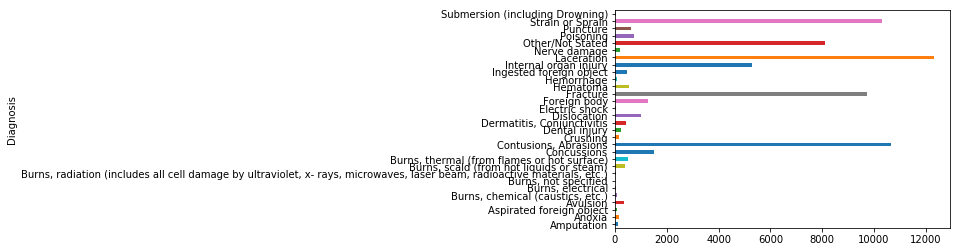

In [10]:
# Count of Diagnosis, Laceration is the most frequent injuries
tbl09 = tbl08.groupby("Diagnosis").size()

# Plot of Diagnosis count
tbl09.plot.barh(x="Diagnosis", y="age_group")

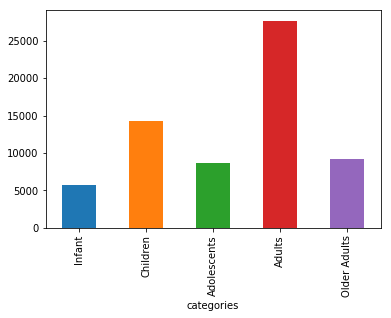

In [11]:
# Count of age categories, most of patients data falls into Adults categories
tbl10 = tbl08.groupby("categories").size()

# Plot of age categories count
tbl10.plot.bar(x="Diagnosis", y="categories")

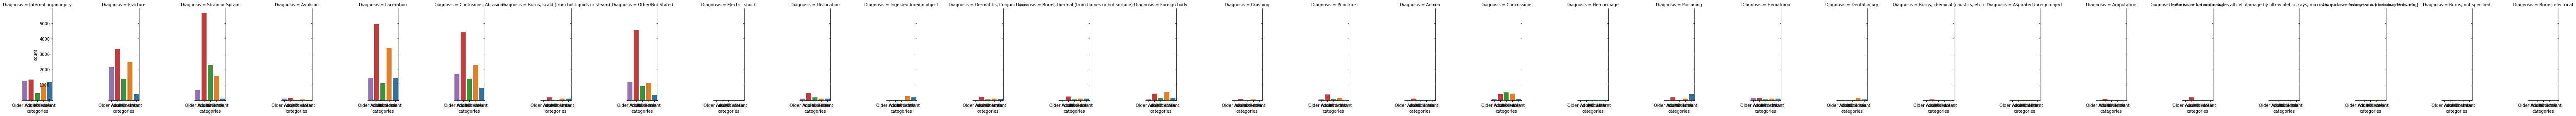

In [12]:
# Count of age categories among respective Diagnosis, distribution of diagnosis is skewed
graph = sns.factorplot(x="categories", col="Diagnosis", data=tbl08, kind="count", size=4, aspect=.7)
graph

In [231]:
# Question 5
"""
Investigate the data however you like and discuss any interesting insights you can find in the data
(Don't feel pressured to spend hours on this)

Answer:
Top 5 products acusing accidents:
    1842: Stairs or Steps
    1807: Carpet divider or metal
    4076: Beds or bedframes, other or not specified
    1205: Basketball
    5040: Bicycles

Among those products, Basketabll is having the least volatilty of age groups and most happend among young adults
"""

"\nInvestigate the data however you like and discuss any interesting insights you can find in the data\n(Don't feel pressured to spend hours on this)\n\nAnswer:\n"

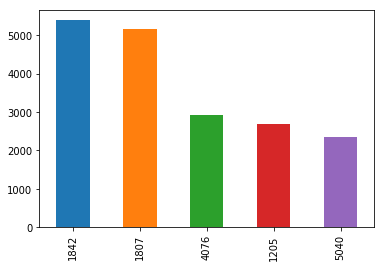

In [250]:
# Top 5 product causing accidents: 
"""
1842: Stairs or Steps
1807: Carpet divider or metal
4076: Beds or bedframes, other or not specified
1205: Basketball
5040: Bicycles
"""
prod = tbl03["prod1"].value_counts()
top5prod = prod.head(5)
top5prod.plot.bar(x="prod1", y="count")

In [204]:
# Top 5 product causing accidents and its age group volatility
"""
1205 is the least volatile among age group within top 5 product causing accidents
"""
top5vol = tbl03[["prod1", "age_group"]].groupby("prod1").agg(np.std, ddof=1)
top5vol.query("prod1 == 1842 or prod1 == 1807 or prod1 == 4076 or prod1 == 1205 or prod1 == 5040")

,age_group
prod1,
1205,9.046909
1807,30.550112
1842,24.420644
4076,34.063664
5040,19.467989


In [246]:
# Least volitile age group among those produts
prod1205 = tbl03.query("prod1 == 1205")

# Most volitile age group among those produts
prod4076 = tbl03.query("prod1 == 4076")

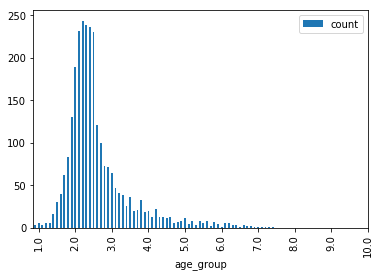

In [247]:
# Ploting distribution of product 1205
prod1205_ax = prod1205.groupby("age_group")["age_group"].agg(["count"]).plot(kind = "bar")
prod1205_ax.set_xticks(range(1,100,10))

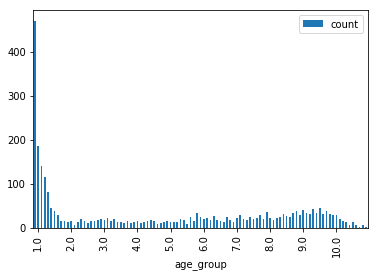

In [249]:
# Ploting distribution of product 4076
prod4076_ax = prod4076.groupby("age_group")["age_group"].agg(["count"]).plot(kind="bar")
prod4076_ax.set_xticks(range(1,100,10))